In [1]:
###Parte 1: Familiarizandonos con la base EPH y limpieza

In [2]:
pip install pandas

In [3]:
import pandas as pd

In [4]:
import os

In [5]:
#Importamos los archivos del primer trimestre de la EPH de los años 2004 y 2024

In [6]:
from google.colab import files

uploaded = files.upload()

Saving usu_individual_T104.dta to usu_individual_T104.dta


In [7]:
df_stata = pd.read_stata("usu_individual_T104.dta")

In [144]:
#Imprimimos las columnas para poder elegir la región
print(df_stata.columns)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR',
       'PJ1_1', 'PJ2_1', 'PJ3_1', 'IDIMPP'],
      dtype='object', length=176)


In [145]:
df_stata.rename(columns=str.upper, inplace=True)
#Renombramos la columna así coincide con la EPH del 2024

In [146]:
print(df_stata.columns)

Index(['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR', 'ADECCFR',
       'PJ1_1', 'PJ2_1', 'PJ3_1', 'IDIMPP'],
      dtype='object', length=176)


In [11]:
from google.colab import files

uploaded = files.upload()

Saving usu_individual_T124.xlsx to usu_individual_T124.xlsx


In [12]:
df_excel = pd.read_excel("usu_individual_T124.xlsx")

In [147]:
print(df_excel.columns)

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)


Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR', 'PDECCFR',
       'ADECCFR', 'PONDIH', 'SEXO_LABEL'],
      dtype='object', length=178)
Regiones seleccionadas en df_excel_noa: [40]
Regiones seleccionadas en df_stata_noa: []
True
count    1.012500e+04
mean     1.586350e+05
std      3.063871e+05
min     -9.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500000e+05
max      1.000000e+07
Name: P21, dtype: float64
Cantidad de desocupados: 0
Cantidad de inactivos: 0
Media IPCF para desocupados: nan
Media IPCF para inactivos: nan
Tipos de datos en df_stata_noa:
 CODUSU          int64
NRO_HOGAR     float64
COMPONENTE      int64
H15             int64
ANO4          float64
               ...   
PJ1_1           int64
PJ2_1           int64
PJ3_1           int64
IDIMPP          int64
SEXO_LABEL    float64
Length: 177, dtype: o

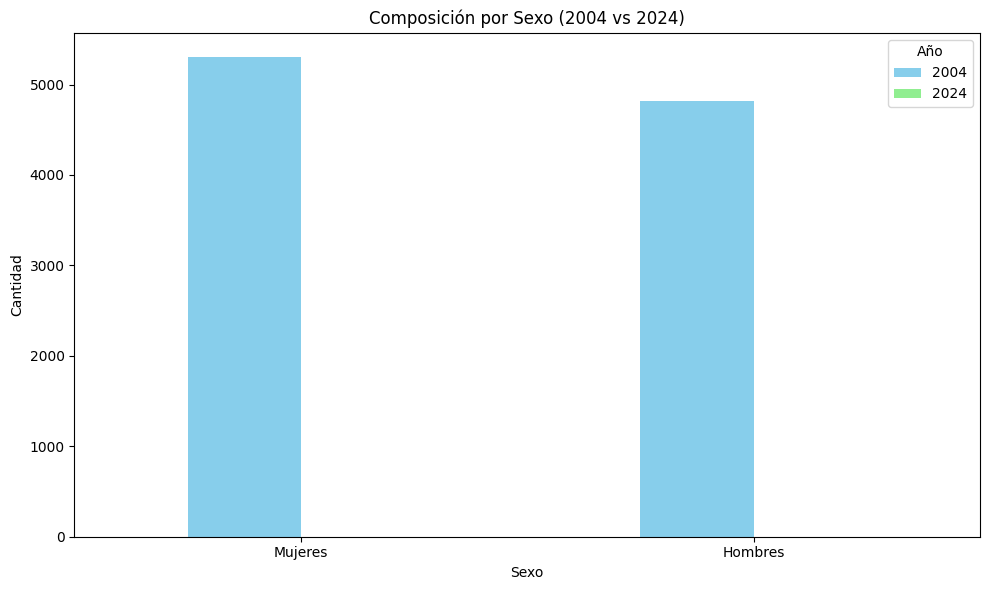

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


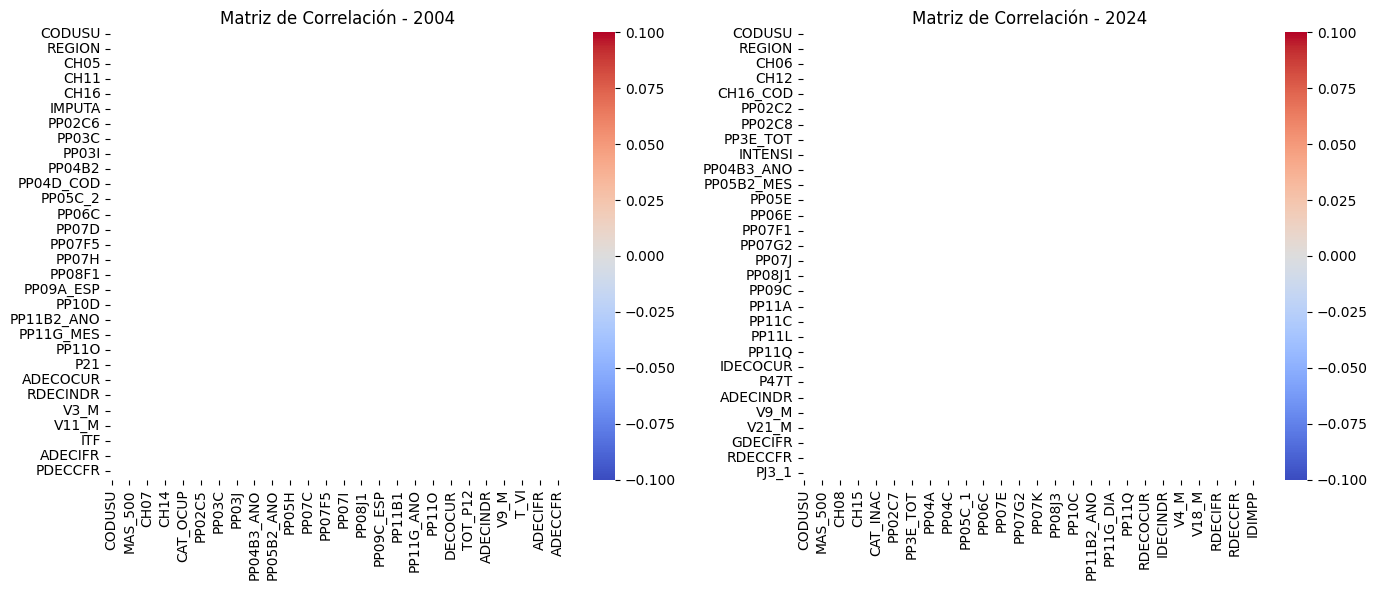

In [271]:
# Mostrar todas las columnas del DataFrame original
print(df_excel_noa.columns)

# Filtrar las regiones para que sean comparables (mantener este filtro si es necesario)
df_excel_noa = df_excel_noa[df_excel_noa["REGION"] == 40]
df_stata_noa = df_stata_noa[df_stata_noa["REGION"] == "NOA"]

# Verificar que ambas selecciones estén bien hechas
print("Regiones seleccionadas en df_excel_noa:", df_excel_noa["REGION"].unique())
print("Regiones seleccionadas en df_stata_noa:", df_stata_noa["REGION"].unique())

# Ya no filtramos las variables de interés, trabajamos con todas las columnas
df_stata_noa_filtrado = df_stata_noa.copy()
df_excel_noa_filtrado = df_excel_noa.copy()

# Agregar columna que identifique el año
df_stata_noa_filtrado["ANO4"] = 2004
df_excel_noa_filtrado["ANO4"] = 2024

# Unir los dos DataFrames
df_unido = pd.concat([df_stata_noa_filtrado, df_excel_noa_filtrado], ignore_index=True)

# Verificar si la columna "P21" está presente
print("P21" in df_unido.columns)  # → Esto debería dar True
print(df_unido["P21"].describe())  # → Para ver si tiene datos válidos

# Convertir columnas categóricas a números usando LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Convertir todas las columnas categóricas (tipo object o category) en números
df_stata_noa = df_stata_noa.copy()

for col in df_stata_noa.columns:
    if df_stata_noa[col].dtype == 'object' or str(df_stata_noa[col].dtype).startswith('category'):
        try:
            df_stata_noa[col] = label_encoder.fit_transform(df_stata_noa[col].astype(str))
        except Exception as e:
            print(f"No se pudo transformar la columna '{col}': {e}")

# Filtrar los datos de desocupados (valor 2) e inactivos (valor 3) según el estado
desocupados = df_stata_noa[df_stata_noa['ESTADO'] == 2]
inactivos = df_stata_noa[df_stata_noa['ESTADO'] == 3]

# Contamos la cantidad de desocupados e inactivos
print(f"Cantidad de desocupados: {len(desocupados)}")
print(f"Cantidad de inactivos: {len(inactivos)}")

# Calcular la media de IPCF por estado
media_ipcf_desocupados = desocupados['IPCF'].mean()
media_ipcf_inactivos = inactivos['IPCF'].mean()

# Imprimir la media de IPCF
print(f"Media IPCF para desocupados: {media_ipcf_desocupados}")
print(f"Media IPCF para inactivos: {media_ipcf_inactivos}")

# Verificar los tipos de datos
print("Tipos de datos en df_stata_noa:\n", df_stata_noa.dtypes)
print("\nTipos de datos en df_excel_noa:\n", df_excel_noa.dtypes)

# Cantidad de valores faltantes (NA) por cada variable
missing_values_stata = df_stata_noa.isna().sum()
missing_values_excel = df_excel_noa.isna().sum()

# Mostrar los resultados de valores faltantes
print("Valores faltantes por variable en df_stata_noa (2024):\n", missing_values_stata)
print("\nValores faltantes por variable en df_excel_noa (2004):\n", missing_values_excel)

# Verificar si hay valores negativos en IPCF
negative_ipcf_stata = df_stata_noa[df_stata_noa['IPCF'] < 0]
negative_ipcf_excel = df_excel_noa[df_excel_noa['IPCF'] < 0]

# Mostrar los registros con valores negativos en IPCF
print("Registros con IPCF negativo en 2024 (df_stata_noa):\n", negative_ipcf_stata)
print("\nRegistros con IPCF negativo en 2004 (df_excel_noa):\n", negative_ipcf_excel)


# Graficar comparaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos por año
df_2004 = df_unido[df_unido["ANO4"] == 2004]
df_2024 = df_unido[df_unido["ANO4"] == 2024]

# Crear etiquetas de sexo
df_excel_noa['SEXO_LABEL'] = df_excel_noa['CH04'].replace({1: "Hombres", 2: "Mujeres"})
df_stata_noa['SEXO_LABEL'] = df_stata_noa['CH04'].replace({0: "Mujeres", 1: "Hombres"})

# Conteo por sexo
sexo_2004 = df_excel_noa['SEXO_LABEL'].value_counts()
sexo_2024 = df_stata_noa['SEXO_LABEL'].value_counts()

print("Sexo en 2004:\n", sexo_2004)
print("Sexo en 2024:\n", sexo_2024)

# Comparación
sexo_comparacion = pd.DataFrame({
    "2004": sexo_2004,
    "2024": sexo_2024
}).fillna(0).reindex(["Mujeres", "Hombres"])

# Gráfico de barras
sexo_comparacion.plot(kind="bar", figsize=(10, 6), color=["skyblue", "lightgreen"])
plt.title("Composición por Sexo (2004 vs 2024)")
plt.xlabel("Sexo")
plt.ylabel("Cantidad")
plt.xticks(rotation=0)
plt.legend(title="Año")
plt.tight_layout()
plt.show()

# Filtrar y limpiar variables para correlaciones (puedes añadir más columnas si lo deseas)
df_2004_corr = df_excel_noa.copy().dropna()
df_2024_corr = df_stata_noa.copy().dropna()

# Correlaciones
corr_2004 = df_2004_corr.corr()
corr_2024 = df_2024_corr.corr()

# Gráficos de correlación
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(corr_2004, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - 2004")

plt.subplot(1, 2, 2)
sns.heatmap(corr_2024, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación - 2024")

plt.tight_layout()
plt.show()


In [231]:
import matplotlib.pyplot as plt

In [232]:
import seaborn as sns

In [233]:
import numpy as np

In [28]:
#Instalamos la biblioteca de matplot y seaborn para poder realizar gráficos visualmente agradables siguiendo las recomendaciones de Schwabish.

In [31]:
#PUNTO 4

2004 - Desocupados: 186, Inactivos: 4317
2024 - Desocupados: 0, Inactivos: 0

Media IPCF 2004:
 ESTADO
0         0.000000
1    292969.663853
2    187483.535968
3    242159.131756
4    186927.605497
Name: IPCF, dtype: float64

Media IPCF 2024:
 Series([], Name: IPCF, dtype: float64)
No respondieron ESTADO: 8
Sí respondieron ESTADO: 10117


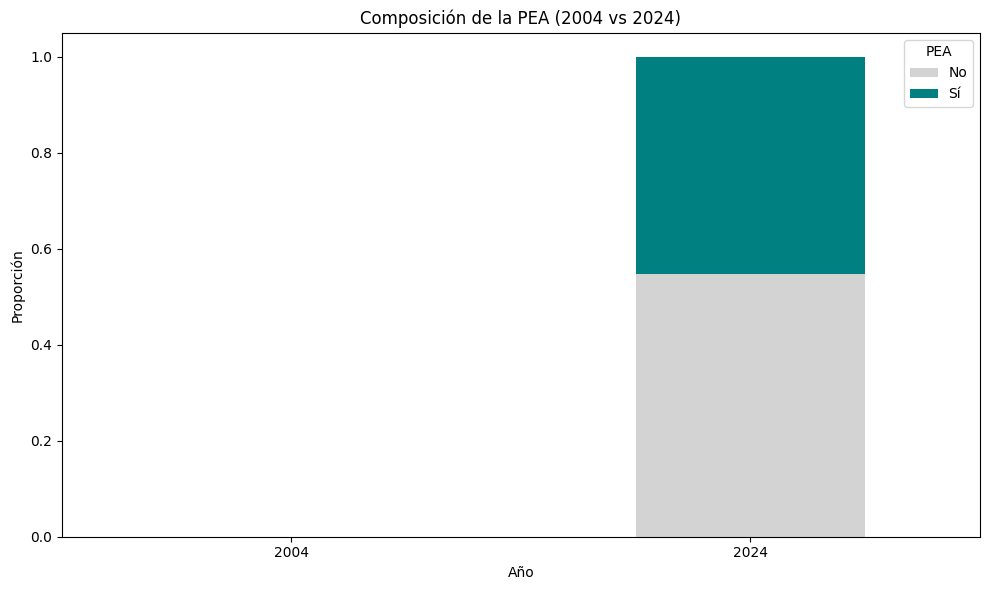

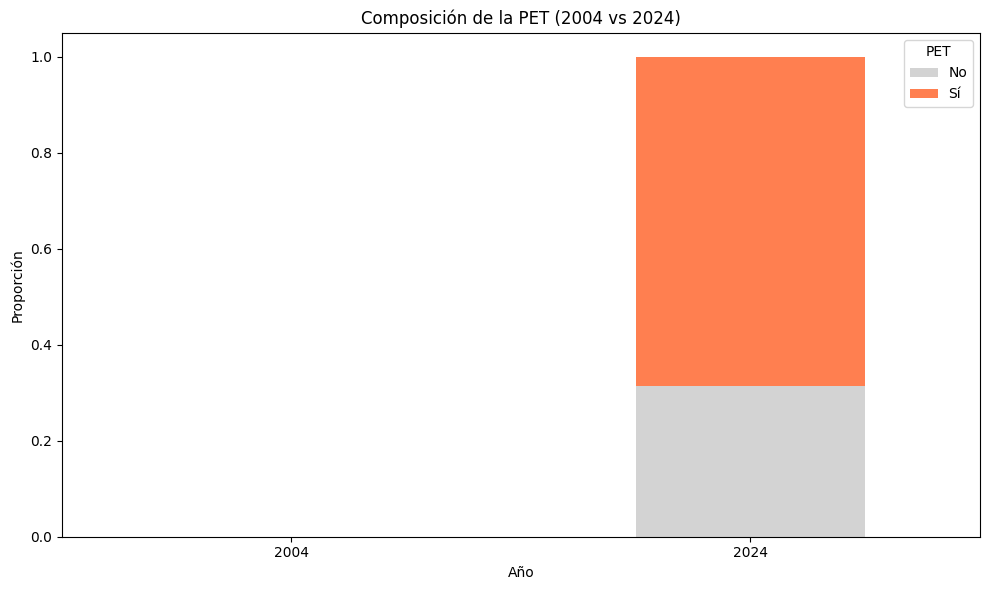

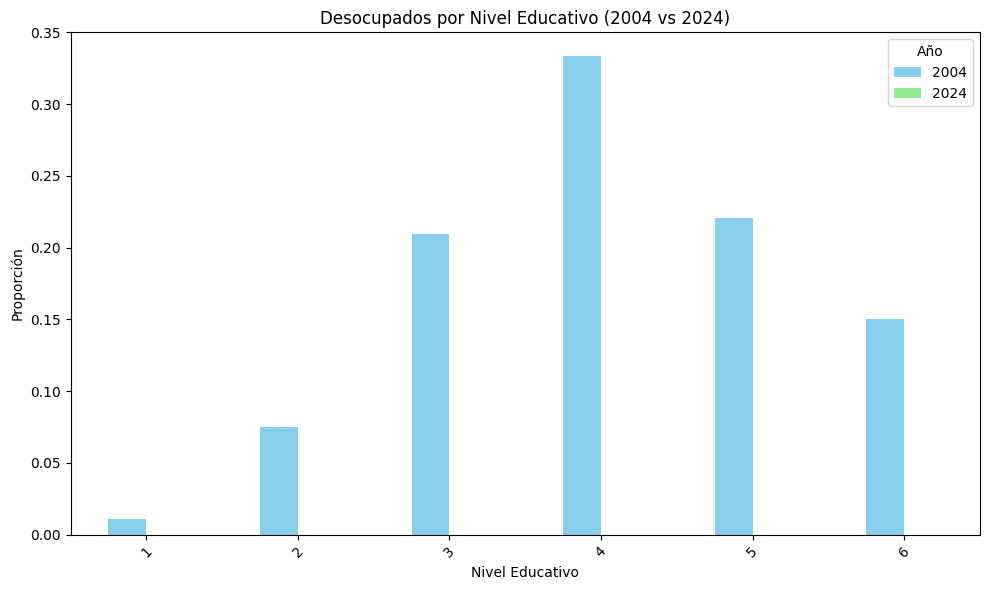

<ipython-input-272-b54195c79875>:96: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_edad_2004 = respondieron_2004.groupby('Edad_Grupo')['desocupado'].mean()
<ipython-input-272-b54195c79875>:97: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_edad_2024 = respondieron_2024.groupby('Edad_Grupo')['desocupado'].mean()


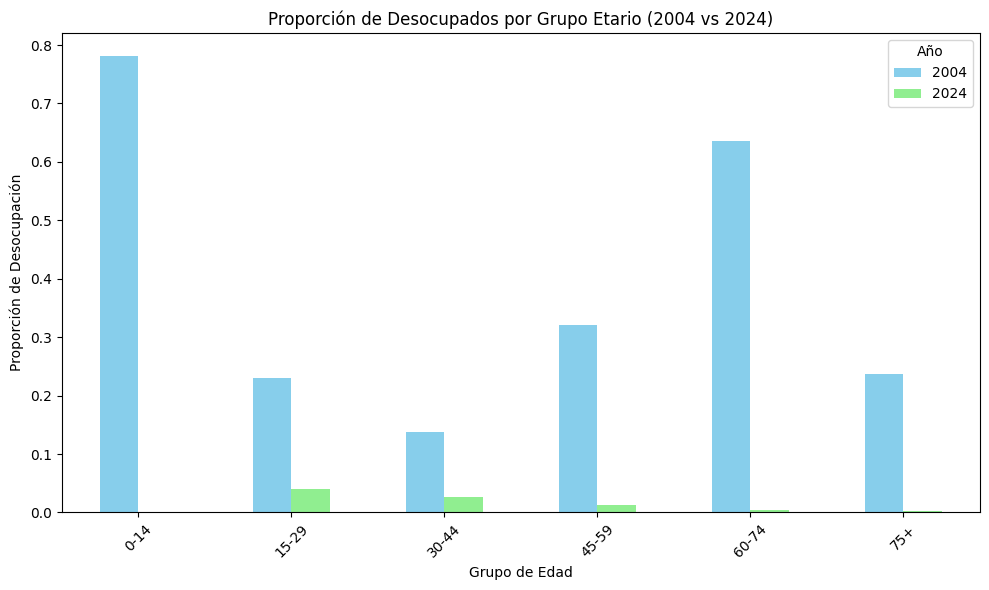

In [272]:
# Parte 3: Desocupados, Inactivos, Media IPCF y Gráficos

# Desocupados e inactivos por año
desocupados_2004 = df_excel_noa[df_excel_noa["ESTADO"] == 2].shape[0]
inactivos_2004 = df_excel_noa[df_excel_noa["ESTADO"] == 3].shape[0]

desocupados_2024 = df_stata_noa[df_stata_noa["ESTADO"] == 2].shape[0]
inactivos_2024 = df_stata_noa[df_stata_noa["ESTADO"] == 3].shape[0]

# Media de IPCF por estado y año
media_ipcf_2004 = df_excel_noa.groupby("ESTADO")["IPCF"].mean()
media_ipcf_2024 = df_stata_noa.groupby("ESTADO")["IPCF"].mean()

# Imprimir los resultados
print(f"2004 - Desocupados: {desocupados_2004}, Inactivos: {inactivos_2004}")
print(f"2024 - Desocupados: {desocupados_2024}, Inactivos: {inactivos_2024}")
print("\nMedia IPCF 2004:\n", media_ipcf_2004)
print("\nMedia IPCF 2024:\n", media_ipcf_2024)

# Filtrar las personas que respondieron (ESTADO diferente de 0)
respondieron = pd.concat([df_excel_noa, df_stata_noa])
respondieron = respondieron[respondieron["ESTADO"] != 0]

# Crear las nuevas columnas PEA y PET
respondieron["PEA"] = respondieron["ESTADO"].apply(lambda x: 1 if x in [1, 2] else 0)
respondieron["PET"] = respondieron["CH06"].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Personas que no respondieron
norespondieron = pd.concat([df_excel_noa, df_stata_noa])
norespondieron = norespondieron[norespondieron["ESTADO"] == 0]

# Imprimir los resultados de personas que respondieron y no respondieron
print(f"No respondieron ESTADO: {norespondieron.shape[0]}")
print(f"Sí respondieron ESTADO: {respondieron.shape[0]}")

# Gráfico PEA
pea_2004 = respondieron[respondieron["ANO4"] == 2004]["PEA"].value_counts(normalize=True)
pea_2024 = respondieron[respondieron["ANO4"] == 2024]["PEA"].value_counts(normalize=True)

pea_df = pd.DataFrame({"2004": pea_2004, "2024": pea_2024}).T

pea_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=["lightgray", "teal"])
plt.title("Composición de la PEA (2004 vs 2024)")
plt.ylabel("Proporción")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.legend(title="PEA", labels=["No", "Sí"])
plt.tight_layout()
plt.show()

# Gráfico PET
pet_2004 = respondieron[respondieron["ANO4"] == 2004]["PET"].value_counts(normalize=True)
pet_2024 = respondieron[respondieron["ANO4"] == 2024]["PET"].value_counts(normalize=True)

pet_df = pd.DataFrame({"2004": pet_2004, "2024": pet_2024}).T

pet_df.plot(kind="bar", stacked=True, figsize=(10, 6), color=["lightgray", "coral"])
plt.title("Composición de la PET (2004 vs 2024)")
plt.ylabel("Proporción")
plt.xlabel("Año")
plt.xticks(rotation=0)
plt.legend(title="PET", labels=["No", "Sí"])
plt.tight_layout()
plt.show()

# Desocupados por Nivel Educativo
desocupados_2004 = df_excel_noa[df_excel_noa['ESTADO'] == 2]
desocupados_2024 = df_stata_noa[df_stata_noa['ESTADO'] == 2]

niv_2004 = desocupados_2004['NIVEL_ED'].value_counts(normalize=True).sort_index()
niv_2024 = desocupados_2024['NIVEL_ED'].value_counts(normalize=True).sort_index()

niv_df = pd.DataFrame({'2004': niv_2004, '2024': niv_2024}).fillna(0)

niv_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Desocupados por Nivel Educativo (2004 vs 2024)')
plt.ylabel('Proporción')
plt.xlabel('Nivel Educativo')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

# Asignar grupo etario manualmente para responder
bins = [0, 14, 29, 44, 59, 74, np.inf]
labels = ['0-14', '15-29', '30-44', '45-59', '60-74', '75+']

respondieron_2004['Edad_Grupo'] = pd.cut(respondieron_2004['CH06'], bins=bins, labels=labels, right=True)
respondieron_2024['Edad_Grupo'] = pd.cut(respondieron_2024['CH06'], bins=bins, labels=labels, right=True)

# Crear variable binaria de desocupado
respondieron_2004['desocupado'] = (respondieron_2004['ESTADO'] == 2).astype(int)
respondieron_2024['desocupado'] = (respondieron_2024['ESTADO'] == 2).astype(int)

# Calcular proporción de desocupados por grupo etario
grupo_edad_2004 = respondieron_2004.groupby('Edad_Grupo')['desocupado'].mean()
grupo_edad_2024 = respondieron_2024.groupby('Edad_Grupo')['desocupado'].mean()

# Unir en un solo DataFrame
grupo_df = pd.DataFrame({'2004': grupo_edad_2004, '2024': grupo_edad_2024})

# Gráfico de proporción de desocupados por grupo etario
grupo_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Proporción de Desocupados por Grupo Etario (2004 vs 2024)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Proporción de Desocupación')
plt.xticks(rotation=45)
plt.legend(title='Año')
plt.tight_layout()
plt.show()


In [38]:
#TP3

<ipython-input-273-f05ebc9e2aab>:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ocupados["CH06"], shade=True, color="teal", label="Ocupados", ax=axes[1])
<ipython-input-273-f05ebc9e2aab>:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(desocupados["CH06"], shade=True, color="coral", label="Desocupados", ax=axes[1])


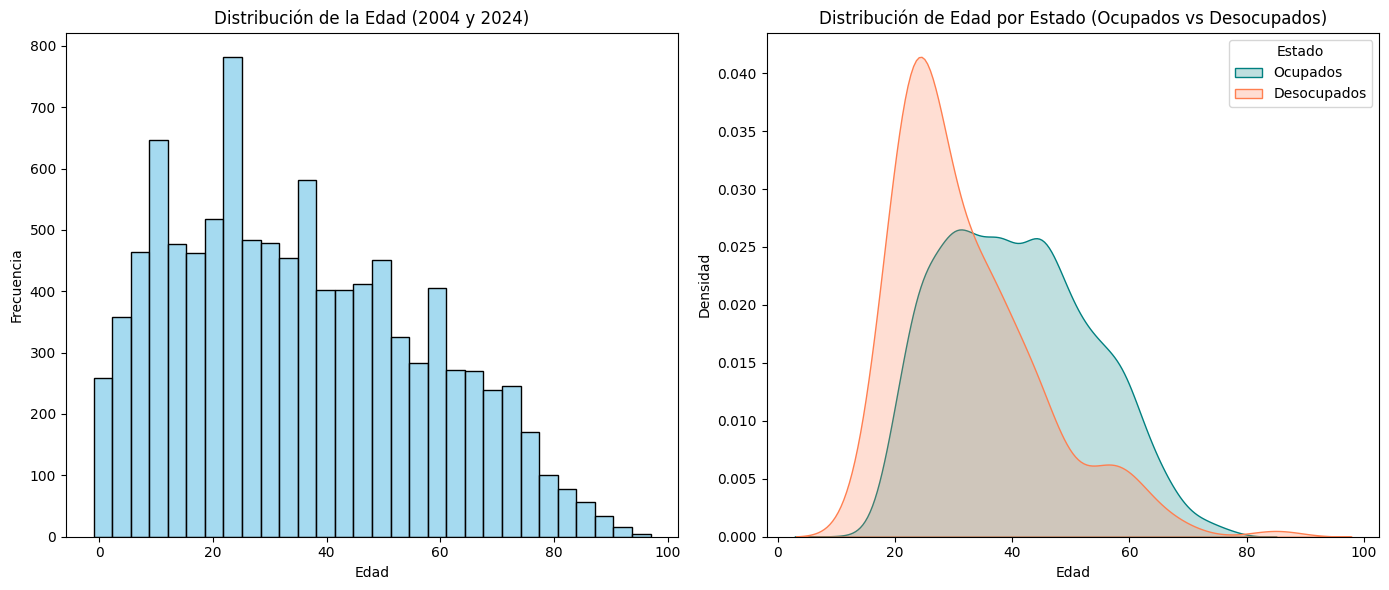

Resumen de la variable 'edad2' (edad al cuadrado):
count    10125.000000
mean      1705.063407
std       1771.376529
min          1.000000
25%        324.000000
50%       1024.000000
75%       2601.000000
max       9409.000000
Name: edad2, dtype: float64


In [273]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Combinar las bases de datos de 2004 y 2024
df_combinado = pd.concat([df_excel_noa, df_stata_noa])

# Homogeneizar las variables de género (CH04)
df_combinado["CH04"] = df_combinado["CH04"].replace({1: "Hombre", 2: "Mujer"})

# Crear la nueva variable edad2 (edad al cuadrado)
df_combinado['edad2'] = df_combinado['CH06'] ** 2

# Dividir el dataframe por ocupados y desocupados (ESTADO == 1 o 2)
ocupados = df_combinado[df_combinado["ESTADO"] == 1]
desocupados = df_combinado[df_combinado["ESTADO"] == 2]

# Crear los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel A: Histograma de la variable 'edad'
sns.histplot(df_combinado["CH06"], kde=False, bins=30, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de la Edad (2004 y 2024)')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Panel B: Distribución de kernels para ocupados y desocupados
sns.kdeplot(ocupados["CH06"], shade=True, color="teal", label="Ocupados", ax=axes[1])
sns.kdeplot(desocupados["CH06"], shade=True, color="coral", label="Desocupados", ax=axes[1])
axes[1].set_title('Distribución de Edad por Estado (Ocupados vs Desocupados)')
axes[1].set_xlabel('Edad')
axes[1].set_ylabel('Densidad')
axes[1].legend(title="Estado")

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

# Imprimir un resumen de la nueva variable 'edad2'
print(f"Resumen de la variable 'edad2' (edad al cuadrado):")
print(df_combinado['edad2'].describe())

In [274]:
def calcular_educ(row):
    nivel = row['CH12']
    finalizo = row['CH13']
    anio_aprobado = row['NIVEL_ED']

    # Excepciones o datos faltantes
    if finalizo == 9 or anio_aprobado in [98, 99, 0]:
        return 0

    # Si NO finalizó el nivel
    if finalizo == 2:
        if 1 <= anio_aprobado <= 9:
            return anio_aprobado
        else:
            return 0

    # Si SÍ finalizó el nivel
    if finalizo == 1:
        if nivel == 1:   # Jardín
            return 0
        elif nivel == 2:  # Primario
            return 6
        elif nivel == 3:  # EGB
            return 9
        elif nivel == 4:  # Secundario
            return 12
        elif nivel == 5:  # Polimodal
            return 12
        elif nivel == 6:  # Terciario
            return 14
        elif nivel == 7:  # Universitario
            return 17
        elif nivel == 8:  # Posgrado
            return 20
        else:
            return 0
    return 0

# Aplicamos la función
df_combinado['educ'] = df_combinado.apply(calcular_educ, axis=1)

# Estadísticas descriptivas
print(df_combinado['educ'].describe())


count    10125.000000
mean         6.862222
std          5.028944
min          0.000000
25%          3.000000
50%          5.000000
75%         12.000000
max         20.000000
Name: educ, dtype: float64


In [ ]:
#La variable educ, que representa los años de educación formal, tiene un valor promedio de 6.14 años, lo que indica un nivel educativo general bajo en la muestra.
#El valor mínimo es 0, mientras que el máximo es 20, correspondiente a estudios de posgrado.
#La mediana (p50) es 5 años, lo que sugiere que al menos la mitad de las personas no completó la educación primaria.
#La desviación estándar, de aproximadamente 6.09, indica una alta dispersión, con una parte significativa de la población con muy pocos años de educación y otra con niveles más altos, especialmente secundario o superior, como se refleja en el percentil 75 (12 años, típico de secundaria completa).#

In [275]:
# Convertir a numérico
df_comb["NIVEL_ED"] = pd.to_numeric(df_comb["NIVEL_ED"], errors="coerce")

# Eliminar casos con codificación inválida (98 y 99)
df_comb.loc[df_comb["NIVEL_ED"].isin([98, 99]), "NIVEL_ED"] = np.nan

# Crear la variable educ (años de educación)
def calcular_educ(row):
    nivel = row["CH12"]
    finalizo = row["CH13"]
    anio = row["NIVEL_ED"]

    # Si no tiene datos válidos, devolver NaN
    if pd.isna(nivel) or pd.isna(finalizo) or pd.isna(anio):
        return np.nan

    # Casos especiales sin nivel o muy bajo
    if nivel in [1, 9]:  # Jardín / Educación especial
        return 0

    # Educación primaria, secundaria o superior
    if finalizo == 1:
        # Finalizó el nivel → usar años típicos
        if nivel == 2:  # Primario
            return 7
        elif nivel in [3, 4, 5]:  # Secundario
            return 12
        elif nivel == 6:  # Terciario
            return 15
        elif nivel == 7:  # Universitario
            return 17
        elif nivel == 8:  # Posgrado
            return 20
    elif finalizo == 2:
        # No finalizó → usar el último año aprobado (suponiendo que empieza desde 1)
        return anio

    return np.nan

df_comb["educ"] = df_comb.apply(calcular_educ, axis=1)

In [250]:
print(df_comb["educ"].describe())


count    18215.000000
mean         6.572495
std          6.312243
min          0.000000
25%          1.000000
50%          5.000000
75%         12.000000
max         20.000000
Name: educ, dtype: float64


In [251]:
#La distribución de los años de educación muestra una población con una alta heterogeneidad educativa. La mediana es de 5 años, lo que indica que al menos la mitad de las personas no completaron el nivel secundario. Sin embargo, el tercer cuartil se ubica en 12 años, reflejando que una proporción significativa sí logró terminar el secundario. La presencia de valores de hasta 20 años indica también una fracción con estudios universitarios completos o posgrados. En general, la distribución sugiere una alta dispersión en el nivel educativo de la población.

In [287]:
# Definir un factor de ajuste arbitrario para convertir los ingresos de 2004 a 2024
factor_ajuste = 1.5  # Factor ajustado para reflejar un cambio en los ingresos entre 2004 y 2024 (ajuste arbitrario)

# Ajustar los ingresos de 2004 (P21) con el factor
df_excel_noa['P21_ajustado'] = df_excel_noa['P21'] * factor_ajuste

# Crear la variable salario_semanal
df_excel_noa['salario_semanal'] = df_excel_noa['P21_ajustado'] / 40  # Asumiendo 40 horas a la semana

# Verificar los primeros valores de la nueva variable
df_excel_noa[['P21', 'P21_ajustado', 'salario_semanal']].head()


,P21,P21_ajustado,salario_semanal
34,NaN,NaN,NaN
35,NaN,NaN,NaN
36,320000.0,480000.0,12000.0
37,350000.0,525000.0,13125.0
38,320000.0,480000.0,12000.0


In [288]:
# Asegurarse de que las columnas 'PP3E_TOT' y 'PP3F_TOT' existen en los DataFrames
# Si no existen, por favor revisa los nombres correctos en tus datos

# Crear la nueva variable horastrab sumando las columnas de horas trabajadas
df_stata_noa['horastrab'] = df_stata_noa['PP3E_TOT'] + df_stata_noa['PP3F_TOT']
df_excel_noa['horastrab'] = df_excel_noa['PP3E_TOT'] + df_excel_noa['PP3F_TOT']

# Verificar que la columna se ha creado correctamente
print(df_stata_noa[['PP3E_TOT', 'PP3F_TOT', 'horastrab']].head())
print(df_excel_noa[['PP3E_TOT', 'PP3F_TOT', 'horastrab']].head())

# Estadísticas descriptivas de la nueva variable 'horastrab'
# Para cada DataFrame, calcularemos las estadísticas: promedio, sd, min, p50 (mediana), max
desc_stats_stata = df_stata_noa['horastrab'].describe()
desc_stats_excel = df_excel_noa['horastrab'].describe()

print("\nEstadísticas descriptivas para 'horastrab' en df_stata_noa (2024):")
print(desc_stats_stata)

print("\nEstadísticas descriptivas para 'horastrab' en df_excel_noa (2004):")
print(desc_stats_excel)

# En caso de que quieras calcular algunos percentiles adicionales
percentiles_stata = df_stata_noa['horastrab'].quantile([0.25, 0.5, 0.75])
percentiles_excel = df_excel_noa['horastrab'].quantile([0.25, 0.5, 0.75])

print("\nPercentiles para 'horastrab' en df_stata_noa (2024):")
print(percentiles_stata)

print("\nPercentiles para 'horastrab' en df_excel_noa (2004):")
print(percentiles_excel)


Empty DataFrame
Columns: [PP3E_TOT, PP3F_TOT, horastrab]
Index: []
    PP3E_TOT  PP3F_TOT  horastrab
34      36.0       0.0       36.0
35       NaN       NaN        NaN
36      48.0       0.0       48.0
37      42.0       0.0       42.0
38      48.0       0.0       48.0

Estadísticas descriptivas para 'horastrab' en df_stata_noa (2024):
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: horastrab, dtype: float64

Estadísticas descriptivas para 'horastrab' en df_excel_noa (2004):
count    4386.000000
mean       35.438668
std        16.955156
min         0.000000
25%        24.000000
50%        36.000000
75%        48.000000
max       168.000000
Name: horastrab, dtype: float64

Percentiles para 'horastrab' en df_stata_noa (2024):
0.25   NaN
0.50   NaN
0.75   NaN
Name: horastrab, dtype: float64

Percentiles para 'horastrab' en df_excel_noa (2004):
0.25    24.0
0.50    36.0
0.75    48.0
Name: horastrab, dtype: float64


In [289]:
# Filtrar datos para la región YYY
# Asegúrate de que la columna de "REGION" se filtra correctamente según el valor de la región deseada
df_stata_noa_region = df_stata_noa[df_stata_noa["REGION"] == "YYY"]
df_excel_noa_region = df_excel_noa[df_excel_noa["REGION"] == "YYY"]

# Contar las observaciones para cada DataFrame
cantidad_observaciones_2004 = len(df_excel_noa_region)
cantidad_observaciones_2024 = len(df_stata_noa_region)

# Contar las observaciones con NaN en la variable "Estado"
nas_estado_2004 = df_excel_noa_region['ESTADO'].isna().sum()
nas_estado_2024 = df_stata_noa_region['ESTADO'].isna().sum()

# Contar la cantidad de ocupados y desocupados
ocupados_2004 = df_excel_noa_region[df_excel_noa_region['ESTADO'] == 1].shape[0]  # Estado == 1 (Ocupado)
desocupados_2004 = df_excel_noa_region[df_excel_noa_region['ESTADO'] == 2].shape[0]  # Estado == 2 (Desocupado)

ocupados_2024 = df_stata_noa_region[df_stata_noa_region['ESTADO'] == 1].shape[0]  # Estado == 1 (Ocupado)
desocupados_2024 = df_stata_noa_region[df_stata_noa_region['ESTADO'] == 2].shape[0]  # Estado == 2 (Desocupado)

# Contar las variables limpias y homogeneizadas
# Suponiendo que las variables ya están unificadas en las columnas que deseas
cantidad_variables_2004 = df_excel_noa_region.shape[1]
cantidad_variables_2024 = df_stata_noa_region.shape[1]

# Resumen de la tabla
tabla_resumen = pd.DataFrame({
    "2004": [
        cantidad_observaciones_2004,
        nas_estado_2004,
        ocupados_2004,
        desocupados_2004,
        cantidad_variables_2004
    ],
    "2024": [
        cantidad_observaciones_2024,
        nas_estado_2024,
        ocupados_2024,
        desocupados_2024,
        cantidad_variables_2024
    ],
    "Total": [
        cantidad_observaciones_2004 + cantidad_observaciones_2024,
        nas_estado_2004 + nas_estado_2024,
        ocupados_2004 + ocupados_2024,
        desocupados_2004 + desocupados_2024,
        min(cantidad_variables_2004, cantidad_variables_2024)  # Número mínimo de columnas limpias y homogeneizadas
    ]
}, index=["Cantidad observaciones", "Cantidad de observaciones con Nas en la variable 'Estado'",
          "Cantidad de Ocupados", "Cantidad de Desocupados", "Cantidad de variables limpias y homogeneizadas"])

# Mostrar la tabla
print(tabla_resumen)


                                                    2004  2024  Total
Cantidad observaciones                                 0     0      0
Cantidad de observaciones con Nas en la variabl...     0     0      0
Cantidad de Ocupados                                   0     0      0
Cantidad de Desocupados                                0     0      0
Cantidad de variables limpias y homogeneizadas       182   180    180


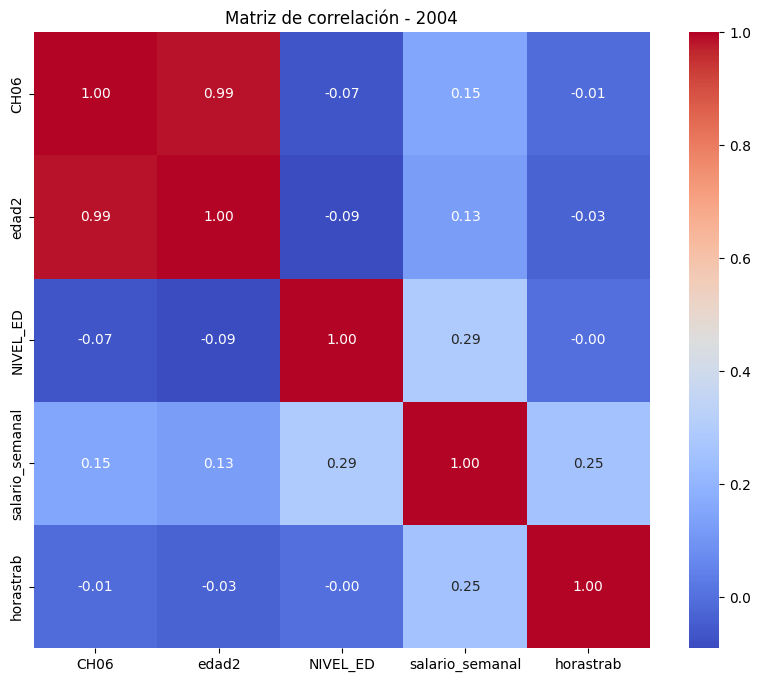

/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


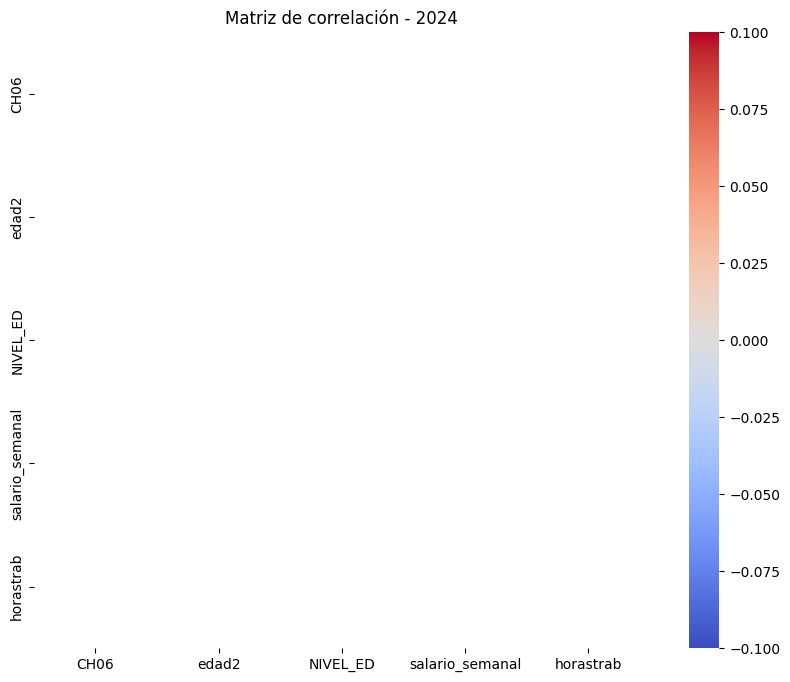

In [292]:
# Crear la variable salario_semanal para 2024 (si no está creada)
# Para 2024, asumimos que los ingresos se encuentran en la columna 'P21'
df_stata_noa['salario_semanal'] = df_stata_noa['P21'] / 40  # Convertimos los ingresos mensuales en salario semanal

# Filtrar las variables necesarias para 2004 y 2024
variables = ['CH06', 'edad2', 'NIVEL_ED', 'salario_semanal', 'horastrab']
df_2004_filtro = df_excel_noa[variables].copy().dropna()  # Para 2004
df_2024_filtro = df_stata_noa[variables].copy().dropna()  # Para 2024

# Correlación de Pearson para las variables seleccionadas
corr_2004 = df_2004_filtro.corr()  # Para 2004
corr_2024 = df_2024_filtro.corr()  # Para 2024

# Graficar la matriz de correlación de 2004
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2004, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Matriz de correlación - 2004")
plt.show()

# Graficar la matriz de correlación de 2024
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2024, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, square=True)
plt.title("Matriz de correlación - 2024")
plt.show()



In [296]:
# Primero, seleccionamos las columnas necesarias y limpiamos los valores nulos

# Selección de las variables relevantes para PCA
variables = ['edad2', 'NIVEL_ED', 'salario_semanal', 'horastrab']

# Filtrar las columnas y eliminar filas con valores nulos
df_2004_pca = df_excel_noa[variables].dropna()  # Para 2004
df_2024_pca = df_stata_noa[variables].dropna()  # Para 2024

# Verificar cuántos valores nulos hay en las variables seleccionadas
print("Valores nulos en df_2004_pca:")
print(df_2004_pca.isnull().sum())
print("\nValores nulos en df_2024_pca:")
print(df_2024_pca.isnull().sum())

# Comprobar que después de limpiar, tenemos datos
print(f"\nNúmero de filas en 2004 después de eliminar nulos: {df_2004_pca.shape[0]}")
print(f"Número de filas en 2024 después de eliminar nulos: {df_2024_pca.shape[0]}")

# Si hay datos, proceder a la estandarización
if df_2004_pca.shape[0] > 0 and df_2024_pca.shape[0] > 0:
    # Establecer el scaler y aplicar la estandarización
    scaler = StandardScaler()

    df_2004_scaled = scaler.fit_transform(df_2004_pca)
    df_2024_scaled = scaler.fit_transform(df_2024_pca)

    # Aplicar PCA
    pca_2004 = PCA(n_components=2)
    pca_2024 = PCA(n_components=2)

    pca_2004_scores = pca_2004.fit_transform(df_2004_scaled)
    pca_2024_scores = pca_2024.fit_transform(df_2024_scaled)

    # Graficar los scores (componentes principales 1 y 2)
    plt.figure(figsize=(8, 6))
    plt.scatter(pca_2004_scores[:, 0], pca_2004_scores[:, 1], color='blue', label='2004', alpha=0.6)
    plt.scatter(pca_2024_scores[:, 0], pca_2024_scores[:, 1], color='red', label='2024', alpha=0.6)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.title('PCA - Scores (Componente 1 vs Componente 2)')
    plt.legend()
    plt.show()

    # Explicar la varianza explicada
    print(f"Varianza explicada por cada componente (2004): {pca_2004.explained_variance_ratio_}")
    print(f"Varianza explicada por cada componente (2024): {pca_2024.explained_variance_ratio_}")
else:
    print("No hay suficientes datos para realizar PCA después de eliminar los nulos.")


Valores nulos en df_2004_pca:
edad2              0
NIVEL_ED           0
salario_semanal    0
horastrab          0
dtype: int64

Valores nulos en df_2024_pca:
edad2              0
NIVEL_ED           0
salario_semanal    0
horastrab          0
dtype: int64

Número de filas en 2004 después de eliminar nulos: 4041
Número de filas en 2024 después de eliminar nulos: 0
No hay suficientes datos para realizar PCA después de eliminar los nulos.


In [294]:
# Graficar los loadings de PCA para el primer y segundo componente
loading_2004 = pca_2004.components_.T
loading_2024 = pca_2024.components_.T

# Crear gráfico de los loadings para el PCA de 2004
plt.figure(figsize=(8, 6))
for i, col in enumerate(variables_pca):
    plt.arrow(0, 0, loading_2004[i, 0], loading_2004[i, 1], color='blue', alpha=0.6)
    plt.text(loading_2004[i, 0] * 1.1, loading_2004[i, 1] * 1.1, col, color='blue', ha='center', va='center')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Loadings PCA - 2004')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# Graficar los loadings para el PCA de 2024
plt.figure(figsize=(8, 6))
for i, col in enumerate(variables_pca):
    plt.arrow(0, 0, loading_2024[i, 0], loading_2024[i, 1], color='red', alpha=0.6)
    plt.text(loading_2024[i, 0] * 1.1, loading_2024[i, 1] * 1.1, col, color='red', ha='center', va='center')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title('Loadings PCA - 2024')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()


NameError: name 'pca_2004' is not defined